<p style="font-family: Arial; font-size:3.5em;color:purple; font-style:bold"><br>
'Kr DST' Study</p><br>

# Reads an analysis DST from FLEX data and plots resolution and others

In [1]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
# General importings
import os
import sys
import glob
import logging
import math
import numpy  as np
import warnings
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

# Specific IC stuff
import invisible_cities.core.system_of_units  as units

from invisible_cities.io.mcinfo_io import load_mcconfiguration
from invisible_cities.io.mcinfo_io import load_mcparticles_df
from invisible_cities.io.mcinfo_io import load_mchits_df
from invisible_cities.io.mcinfo_io import load_mcsensor_positions
from invisible_cities.io.mcinfo_io import load_mcsensor_response_df
from invisible_cities.io.mcinfo_io import get_sensor_types
from invisible_cities.io.mcinfo_io import get_sensor_binning
from invisible_cities.io.mcinfo_io import get_event_numbers_in_file
from invisible_cities.core.core_functions import in_range


In [3]:
from nextflex.krypton_dst import get_evt_true_positions_and_energy
from nextflex.krypton_dst import NN

In [94]:
from nextflex.krypton_analysis import histo_df
from nextflex.krypton_analysis import histos_df
from nextflex.krypton_analysis import kr_point_resolution
from nextflex.krypton_analysis import q_sipm
from nextflex.krypton_analysis import  q4_sipm

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
plt.rcParams["figure.figsize"] = 8, 6
plt.rcParams["font.size"     ] = 14

# Code

## Study of TP response

Asumptions:

- Hamamatsu SiPMs, 1.3 x 1.3 mm2
- 15 mm from anode
- Masks are 6 mm tall, 6 mm opening
- "Old" EL formula (140 photons/e/keV)
- **Important** : PDE of sensors (50 %) not included and effect of masks not included


### FLEX100_M6_O6

In [67]:
iPATH = f"/Users/jj/Development/demoData/FLEX100_M6_O6"
krdst = pd.read_csv(f'{iPATH}/krdst.csv')
print(f'Configuration = FLEX100_M6_O6')

Configuration = FLEX100_M6_O6


In [68]:
krdst

,Unnamed: 0,event_id,true_x,true_y,true_z,KE,S1e,S2e,Qtot,xmax,ymax,xpos,ypos,qmax,ql,qr,qu,qd
0,0,101900,359.476500,9.660492,722.39014,55.389090,18,8395,794,357.65,15.55,359.764797,12.276316,54,27,44,18,42
1,1,101901,186.837890,-43.123417,1162.73030,41.543297,22,8774,747,186.60,-46.65,185.241266,-44.522106,38,37,28,35,22
2,2,101902,-259.909730,-53.806812,1087.68680,54.014584,29,8693,829,-264.35,-46.65,-262.321742,-49.175214,54,23,38,22,41
3,3,101903,-399.442720,-187.637620,699.62256,41.543297,28,7923,756,-404.30,-186.60,-401.106691,-185.571904,59,15,38,35,27
4,4,101904,77.765274,-40.491470,991.10700,43.017110,35,8940,771,77.75,-46.65,78.411702,-42.974546,50,20,24,43,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,95,103595,-183.870450,435.716060,677.17190,41.543297,24,6810,614,-186.60,435.40,-184.430236,429.269709,63,24,42,0,41
9996,96,103596,273.419280,-302.450700,1186.15840,54.050537,20,8160,780,279.90,-311.00,276.088722,-308.639732,43,42,17,43,26
9997,97,103597,267.384200,-260.087040,634.82007,41.543297,31,8315,784,264.35,-264.35,268.052384,-261.522730,74,19,54,41,17
9998,98,103598,406.801400,-110.261090,435.15662,41.543297,11,7737,760,404.30,-108.85,406.156710,-109.516428,68,25,41,33,39


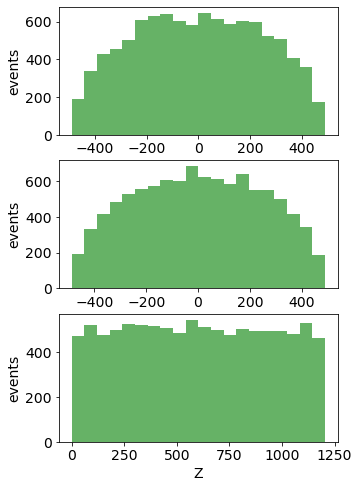

In [83]:
histos_df(krdst, 
         vars    = ('true_x','true_y','true_z'), 
         varmins = (-500,-500,0),
         varmaxs = (500,500,1500), 
         xlabels = ('X', 'Y', 'Z'),
         ylabels = ('events', 'events', 'events'),
         bins    = (20,20,20), 
         alphas  = (0.6, 0.6, 0.6), 
         colors  = ('g','g','g'),
         splt    = (3,1), 
         figsize = (5,8)
        )

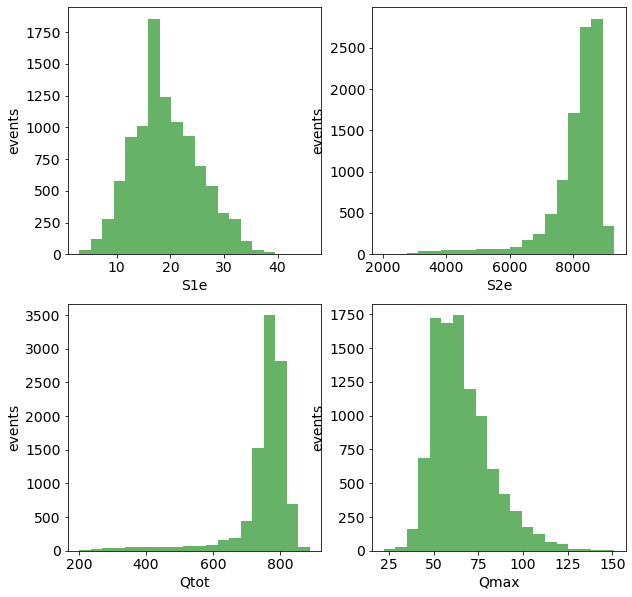

In [87]:
histos_df(krdst, 
         vars    = ('S1e','S2e','Qtot','qmax'), 
         varmins = (0,2000,200,20),
         varmaxs = (50,10000,1000,200), 
         xlabels = ('S1e','S2e','Qtot','Qmax'),
         ylabels = ('events', 'events', 'events','events'),
         bins    = (20,20,20,20), 
         alphas  = (0.6, 0.6, 0.6,0.6), 
         colors  = ('g','g','g','g'),
         splt    = (2,2), 
         figsize = (10,10)
        )

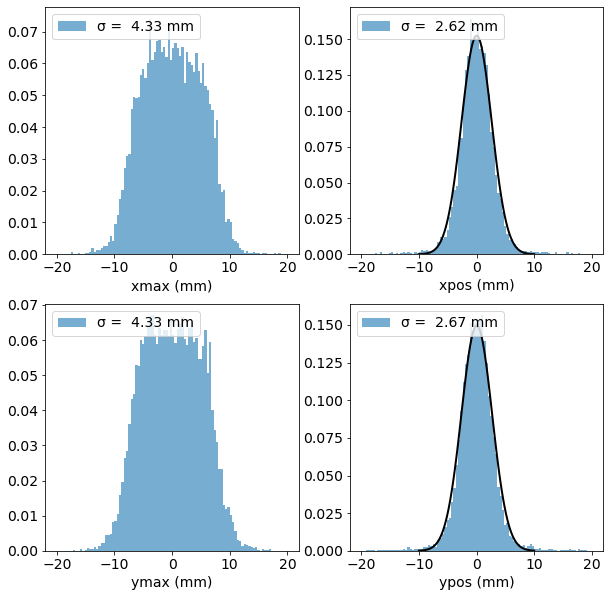

In [91]:
kr_point_resolution(krdst, xlim=(-10,10), bins=100, figsize=(10,10), alpha=0.6)

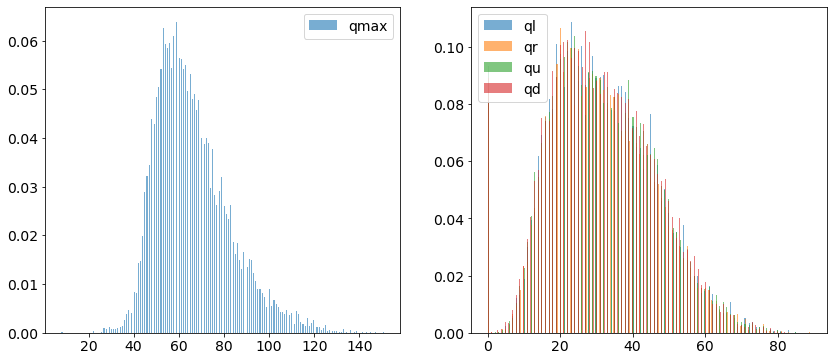

In [92]:
q_sipm(krdst,  bins=300, figsize=(14,6), alpha=0.6)

### FLEX100_M6_O6_memb

In [53]:
iPATH = f"/Users/jj/Development/demoData/FLEX100_M6_O6_memb"

In [54]:
krdst = pd.read_csv(f'{iPATH}/krdst.csv')

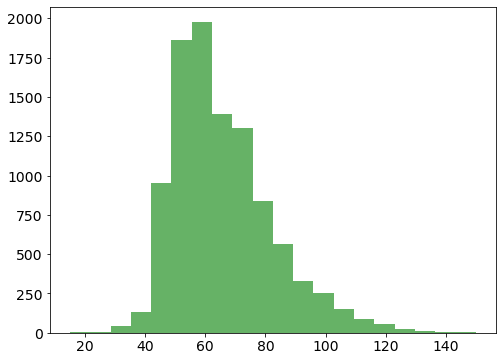

In [34]:
histo_var(krdst, 'qmax', 0, 1000, bins=20, alpha=0.6, color='g')

In [55]:
krdst.describe()

,Unnamed: 0,event_id,true_x,true_y,true_z,KE,S1e,S2e,Qtot,xmax,ymax,xpos,ypos,qmax,ql,qr,qu,qd
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,49.500000,4999.50000,-0.132504,0.440013,610.478155,44.385573,20.461800,8089.888400,752.274000,-0.334325,0.373200,-0.228317,0.411872,65.751200,31.153500,31.976900,31.789300,31.50190
std,28.867513,2886.89568,246.141402,243.043838,346.858848,5.494491,36.750967,941.100359,89.252642,245.948041,242.892803,245.625411,242.562106,16.451291,14.165437,14.218762,14.179373,14.18403
min,0.000000,0.00000,-489.237340,-491.677460,0.087950,41.543297,1.000000,2067.000000,180.000000,-482.050000,-482.050000,-479.587915,-479.726435,15.000000,0.000000,0.000000,0.000000,0.00000
25%,24.750000,2499.75000,-199.072177,-196.084227,312.533930,41.543297,15.000000,7911.000000,746.000000,-202.150000,-202.150000,-200.107929,-198.718022,54.000000,21.000000,21.000000,21.000000,21.00000
50%,49.500000,4999.50000,-0.873764,0.360636,611.424440,41.543297,19.000000,8343.000000,773.000000,0.000000,0.000000,-0.374995,0.171019,63.000000,30.000000,31.000000,31.000000,30.00000
75%,74.250000,7499.25000,196.651893,198.041813,911.737185,42.930777,23.000000,8639.250000,796.000000,202.150000,202.150000,198.842770,199.513097,74.000000,41.000000,42.000000,41.000000,41.00000
max,99.000000,9999.00000,490.540920,490.310400,1204.875500,104.128170,2009.000000,9267.000000,892.000000,482.050000,482.050000,480.391332,480.494999,150.000000,88.000000,83.000000,96.000000,86.00000


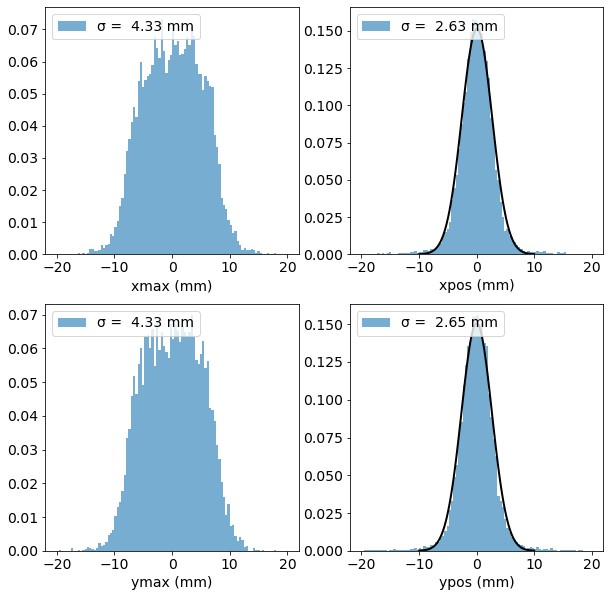

In [56]:
resolution(krdst, xlim=(-10,10), bins=100, figsize=(10,10), alpha=0.6)

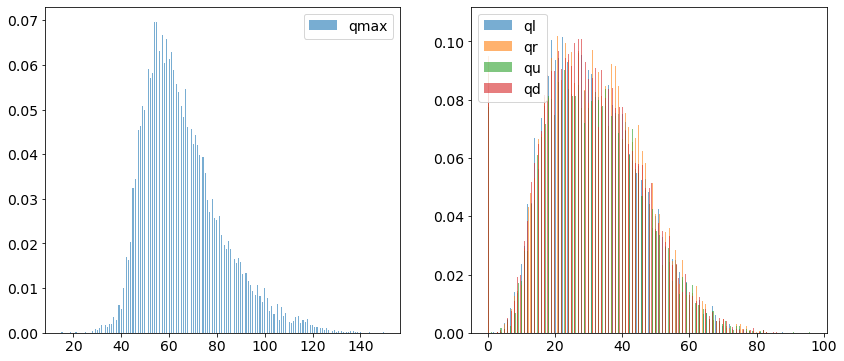

In [57]:
q_sipm(krdst,  bins=300, figsize=(14,6), alpha=0.6)

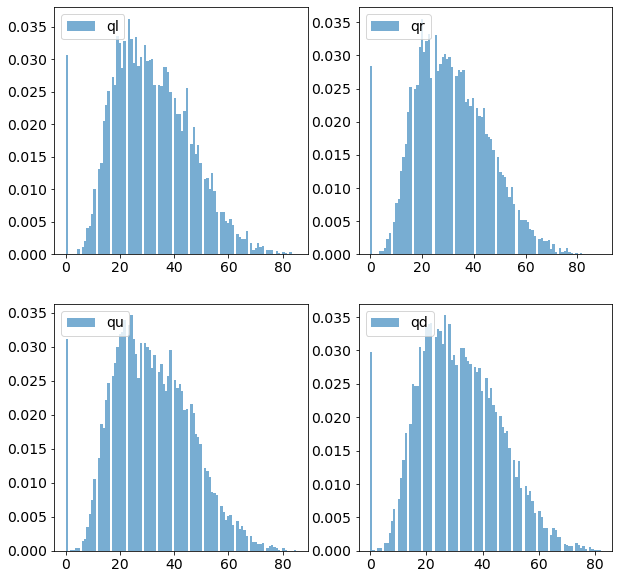

In [95]:
q4_sipm(krdst,  bins=100, figsize=(10,10), alpha=0.6)

### FLEX100_M6_O6_UV

In [60]:
PATH = f"/Users/jj/Development/demoData/FLEX100_M6_O6_UV"
krdst = pd.read_csv(f'{PATH}/krdst.csv')
print(f'Configuration = FLEX100_M6_O6_UV')

Configuration = FLEX100_M6_O6_UV


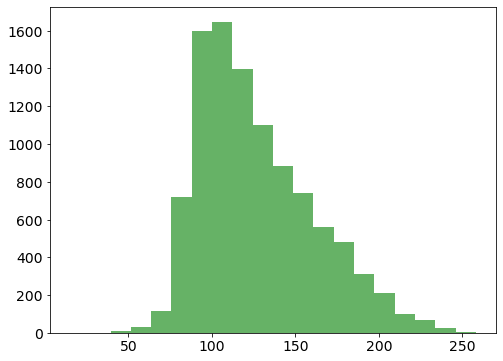

In [61]:
histo_var(krdst, 'qmax', 0, 1000, bins=20, alpha=0.6, color='g')

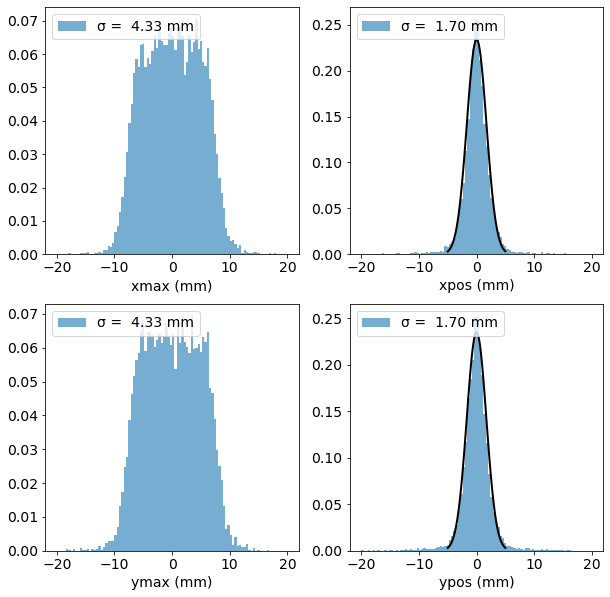

In [63]:
resolution(krdst, xlim=(-5,5), bins=100, figsize=(10,10), alpha=0.6)

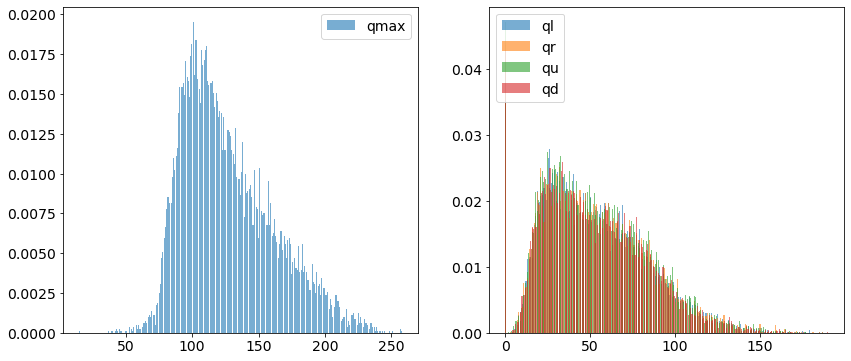

In [64]:
q_sipm(krdst,  bins=300, figsize=(14,6), alpha=0.6)